In [1]:
import os
os.environ['AOC_SESSION'] = '53616c7465645f5fff342ea51d49e23402683c410592072d5487798e3d888065a12dfdfa0cfeaf85aa08c4f9628b97149f851b24e02d0bb1c19821c2f480b284'

In [18]:
import numpy as np
from scipy.signal import convolve2d
import matplotlib.pyplot as plt

In [2]:
import aocd
from aocd.models import Puzzle
day = 4
year = 2025
puzzle = Puzzle(year=year, day=day)
# data = aocd.get_data(day=day, year=year)
with open('./data/input_{:02d}'.format(day), 'w') as fh:
    fh.write(puzzle.input_data)

In [3]:
test_data = """..@@.@@@@.
@@@.@.@.@@
@@@@@.@.@@
@.@@@@..@.
@@.@@@@.@@
.@@@@@@@.@
.@.@.@.@@@
@.@@@.@@@@
.@@@@@@@@.
@.@.@@@.@."""
data_test = test_data.splitlines()

In [4]:
data = puzzle.input_data.splitlines()
len(data), data[:10]

(139,
 ['@@@@@@@@@@.@@@@@@@@@.@@..@..@.@.@@@@@@@@.....@@@@@@@@.@@@@..@@@@@@@@@@@@@@@.@...@.@....@@@..@..@@.@.@@@..@@@@@@@@@.@@@..@.@@....@@@@@@.@@.@',
  '..@@.@..@@@@@@@@...@@@.@@.@@@..@....@.@...@.@..@.@@.@.@@...@@@@@@....@@@.@@@@@.@@.@@@.@@.@@@.@@@@.@..@.@@@@@@....@@.@@@.@.@@...@@@..@@@.@.@',
  '@...@.@.@@.@@......@@@@@...@@@..@@.@@@.@@..@..@@@.@@@@.@.@.@@@..@@@@@.@@@@@@@...@.@@.@.@.@@.@@.@@@@.@@@@@..@@.@@@@@.@@.@@@.@@.@@@.@@@@@....',
  '@.@.@..@@..@.@@@@@.@@@@@@@@.@.@@..@@.@@@..@..@.@...@@@.@@..@.@@@@..@@@@@@@.@@@@@.@@...@@@..@@@@@@..@.@..@@@@.@@.@@.@....@@@.@....@.@@.@.@.@',
  '@.@.@.@@@@@@@.@@.@@@@@@@@.@..@@@@@.@@@@@@@@@.@@@@@@@@.@@@@@@@@@@@@@@@@@@@.@@@@@@.@@@.@@@.@@@@@@@@.@@@.@.@@@@@@@@@@@.@..@@@..@.@@..@@@@..@@.',
  '.@.@.@.@@@.@.@@@.@@@@@@.@.@@@@@@.@...@@@..@@@@@.@@@.@@@@@@.@@@@@@.@@@@.@@.@.@@@.@@@@.@..@@..@@.@@@..@..@@.@@.@.@@@@.@@...@..@@..@@@@@@.@@.@',
  '@@.@@.@@...@@@..@@@.@@@@.@@@.@@@@@.@.@@@@@.@@....@@@.@@@@@.@..@..@@..@...@.@@@@@.@@@@.@@.@.@.@..@.@.@@@@.@@@.@.@@@@.....@

In [ ]:
def parse(line):
    return [int(c == '@') for c in line]


In [30]:
# dat = data_test
dat = data

X = len(dat[0])
Y = len(dat)

grid = np.array([parse(line) for line in dat])
kernel = np.ones((3,3))
nbrs = convolve2d(grid, kernel, mode='same')

tot = (grid & (nbrs <=4)).sum()
tot

np.int64(1564)

In [31]:
puzzle.answer_a = str(tot)

That's the right answer!  You are one gold star closer to decorating the North Pole. [Continue to Part Two]


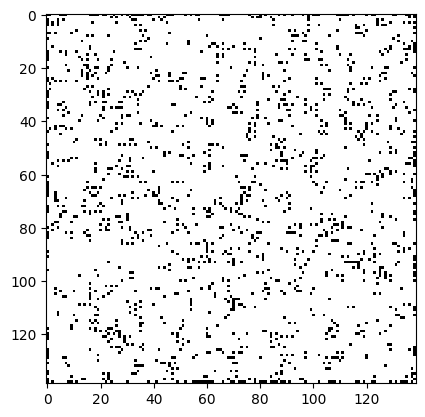

In [33]:
plt.imshow((grid & (nbrs <=4)), cmap='Greys', interpolation='nearest')

In [ ]:
# Part 2

In [42]:
# dat = data_test
dat = data

X = len(dat[0])
Y = len(dat)

grid = np.array([parse(line) for line in dat])
kernel = np.ones((3,3))

tot = 0
while True:
    nbrs = convolve2d(grid, kernel, mode='same')
    remove = grid & (nbrs <=4)
    new_grid = grid.copy()
    new_grid ^= remove
    tot += remove.sum()
    if (new_grid == grid).all():
        break
    grid = new_grid

tot

np.int64(9401)

In [43]:
puzzle.answer_b = str(tot)

That's the right answer!  You are one gold star closer to decorating the North Pole.You have completed Day 4! You can [Shareon
  Bluesky
Twitter
Mastodon] this victory or [Return to Your Advent Calendar].


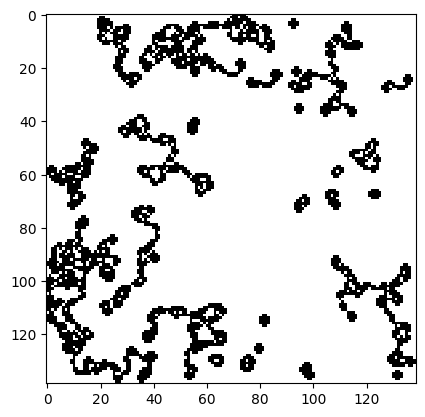

In [44]:
plt.imshow(grid, cmap='Greys', interpolation='nearest')